# Problem-Statement(Bank_data)
Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle 

In [2]:
# load data
data=pd.read_csv("/content/bank-full.csv",sep=";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
print(type(data))
print(data.shape)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data[data.duplicated()].shape

(0, 17)

In [12]:
data1=data.drop_duplicates()
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
data1[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Missing values and imputaion

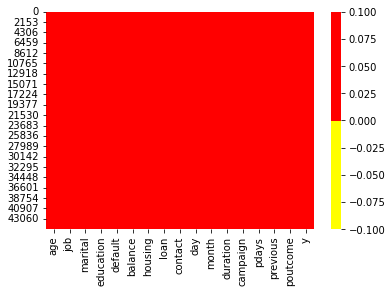

In [14]:
import seaborn as sns
cols=data1.columns
colours=["yellow","red"]  # if yellow - it is missing value
sns.heatmap(data1[cols].isnull(),
           cmap=sns.color_palette(colours))

## Boxplot for all variables

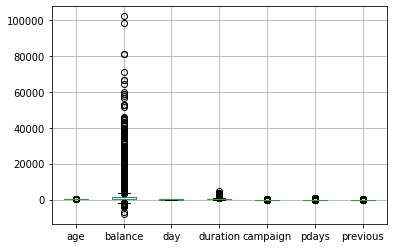

In [15]:
data1.boxplot()

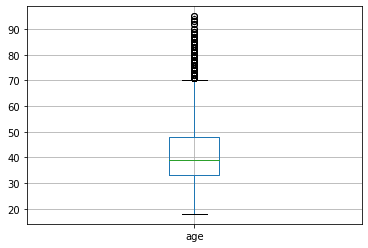

In [16]:
data1.boxplot(column="age")

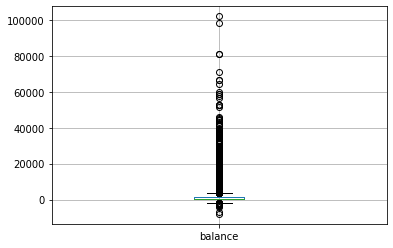

In [17]:
data1.boxplot(column="balance")

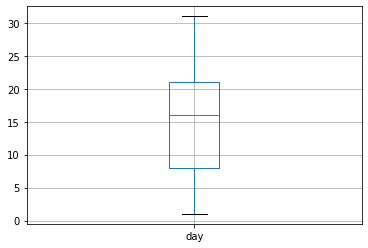

In [18]:
data1.boxplot(column="day")

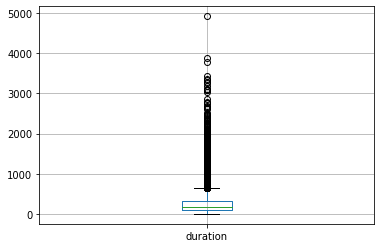

In [19]:
data1.boxplot(column="duration")

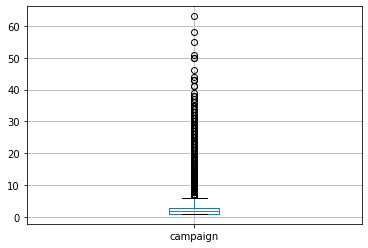

In [20]:
data1.boxplot(column="campaign")

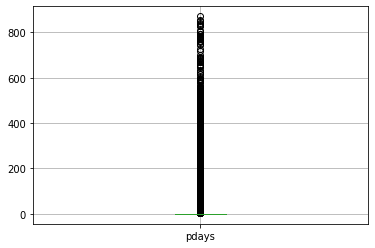

In [21]:
data1.boxplot(column="pdays")

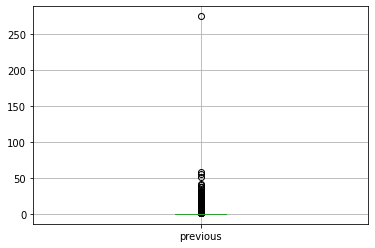

In [22]:
data1.boxplot(column="previous")

# Correlation

In [23]:
data1.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Scatterplot between variables along with histograms

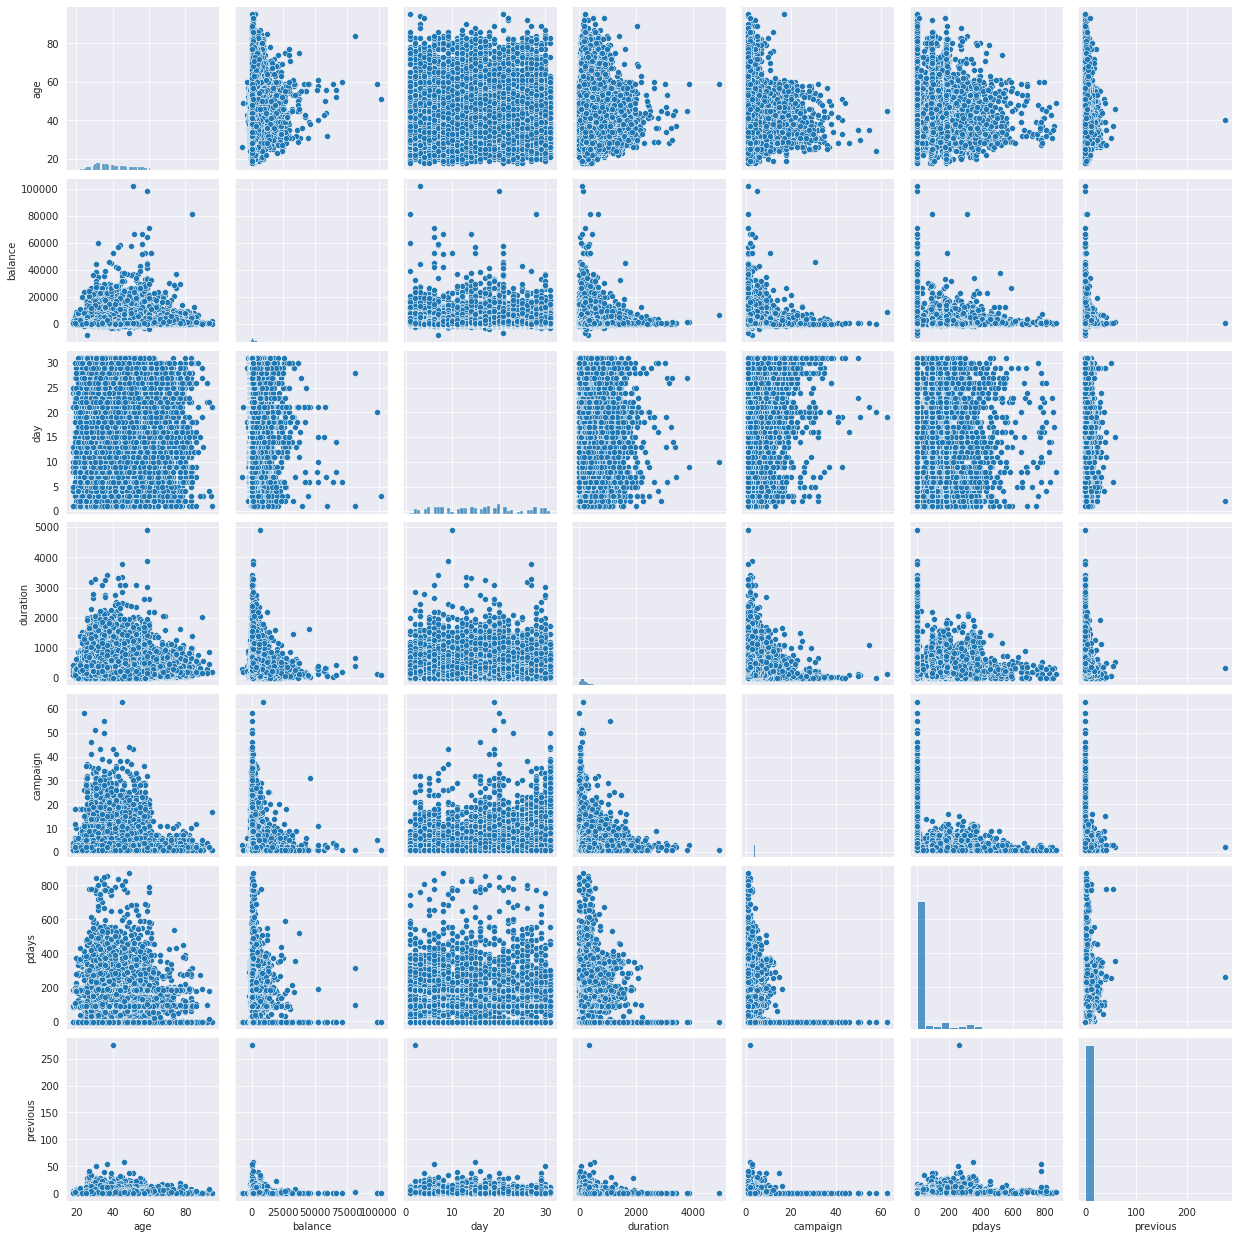

In [24]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# y -> Whether the client has subscribed a term deposit or not

In [25]:
count_no_sub = len(data1[data1['y']=='no'])
count_no_sub

39922

In [26]:
count_yes_sub = len(data1[data1['y']=='yes'])
count_yes_sub

5289

## Countplot for subscribed and not subscribed

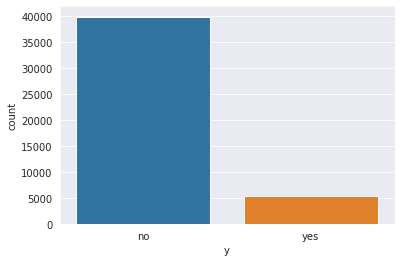

In [27]:
# age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
sns.countplot(x="y",data=data)

the client has subscribed a term deposit to 5000
the client has not subscribed a term deposit to 40000

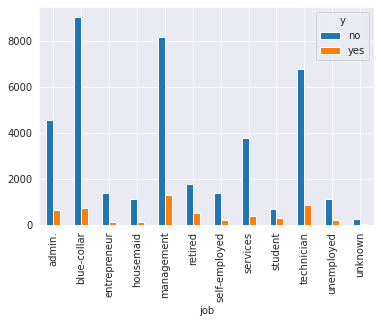

In [28]:
pd.crosstab(data1.job,data1.y).plot(kind='bar')

the client has high subscribed a term deposit with jobs management,technician,blue-collor

the client has lowest subscribed a term deposit with jobs unknown jobs,unemployed,selfemployeed,homemaid,student.

other jobs with better subscribed a term deposit are retired,admin,service


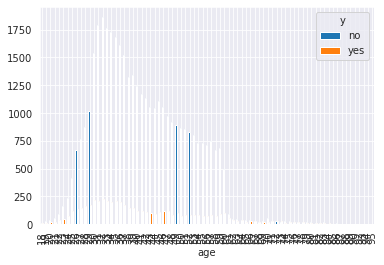

In [29]:
pd.crosstab(data1.age,data1.y).plot(kind='bar')

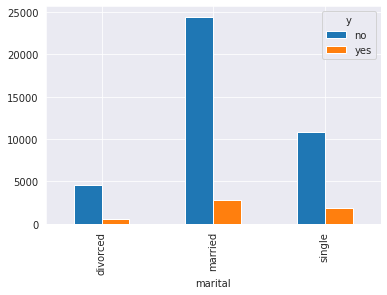

In [30]:
pd.crosstab(data1.marital,data1.y).plot(kind='bar')

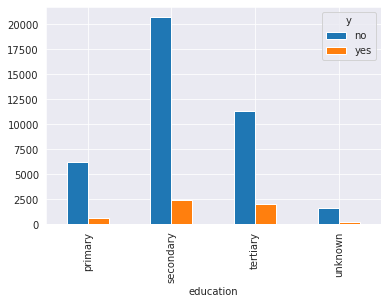

In [31]:
pd.crosstab(data1.education,data1.y).plot(kind='bar')

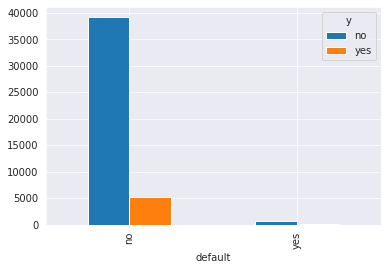

In [32]:
pd.crosstab(data1.default,data1.y).plot(kind='bar')

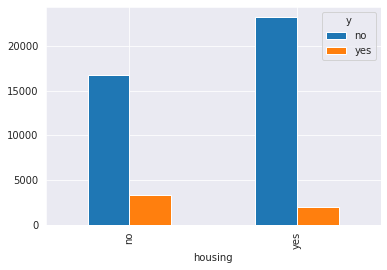

In [33]:
pd.crosstab(data1.housing,data1.y).plot(kind='bar')

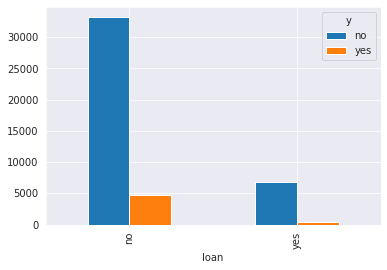

In [34]:
pd.crosstab(data1.loan,data1.y).plot(kind='bar')

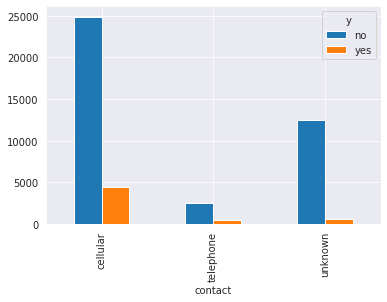

In [35]:
pd.crosstab(data1.contact,data1.y).plot(kind='bar')

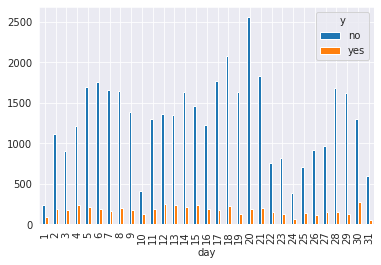

In [36]:
pd.crosstab(data1.day,data1.y).plot(kind='bar')

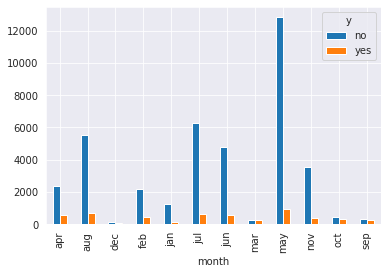

In [37]:
pd.crosstab(data1.month,data1.y).plot(kind='bar')

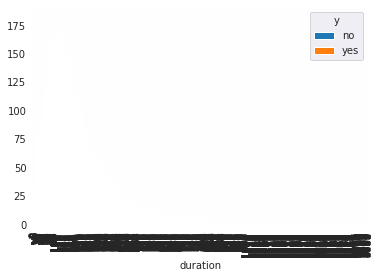

In [38]:
pd.crosstab(data1.duration,data1.y).plot(kind='bar')

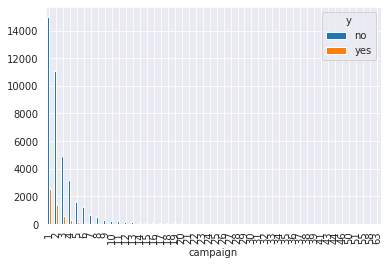

In [39]:
pd.crosstab(data1.campaign,data1.y).plot(kind='bar')

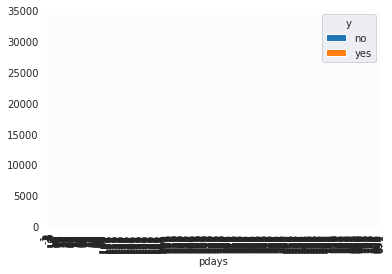

In [40]:
pd.crosstab(data1.pdays,data1.y).plot(kind='bar')

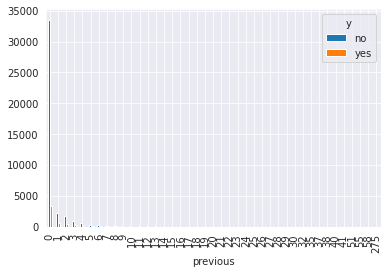

In [41]:
pd.crosstab(data1.previous,data1.y).plot(kind='bar')

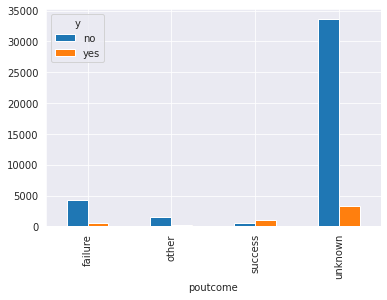

In [42]:
pd.crosstab(data1.poutcome,data1.y).plot(kind='bar')

In [43]:
data1 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Changing type from object to category 

as logistic regression cannot be conducted on object type

In [44]:
# 'job','marital','education','default','housing','loan','contact','poutcome','month','y has type "object"

# to convert object to category to convert it in binary

data[['job','marital','education','default','housing','loan','contact','poutcome','month',
       'y']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month', 'y']].astype('category')
data1 = data

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [46]:
# age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y

data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['month'] = data1['month'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['y'] = data1['y'].cat.codes

In [47]:
x = data1.iloc[:,:16]
y = data1.iloc[:,16]

In [48]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

# Logistic regression model

In [50]:
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Predication

In [51]:
y_pred = classifier.predict(x)

In [52]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [53]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


## Confusion Matrix

In [54]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39279   643]
 [ 4437   852]]


## MLR

In [55]:
((39279+852)/(39279+643+4437+852))

0.8876379642122493

## Classification report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



# ROC Curve

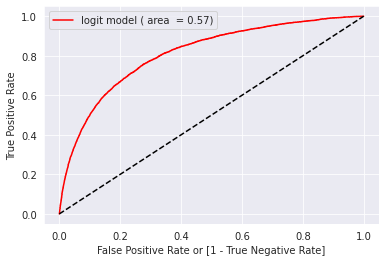

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()

In [58]:
auc

0.5724913226281891

# Summary 

In [59]:
import statsmodels.api as sm

sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.2342
Time:                        05:31:30   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""